# 理解Python中的数据类型

要实现高效的数据驱动科学和计算，需要理解数据是如何被存储和操作的。本节将介绍在 `Python` 语言中数据数组是如何被处理的，并对比 `NumPy` 所做的改进。理解这个不同之处是理解本书其他内容的基础。

In [1]:
import numpy as np

In [2]:
np.__version__

'1.21.1'

## 1. Python整型不仅仅是一个整型

标准的 `Python` 实现是用 `C` 语言编写的。这意味着每一个 `Python` 对象都是一个聪明的伪 `C` 语言结构体，该结构体不仅包含其值，还有其他信息。  
例如，当我们在 `Python` 中定义一个整型，例如 `x = 10000` 时，`x`并不是一个“原生”整型，而是一个指针，指向一个 `C` 语言的复合结构体，结构体里包含了一些值。  
查看 Python 3.4 的源代码，可以发现整型（长整型）的定义，如下所示（`C` 语言的宏经过扩展之后）：
```c
struct _longobject {
long ob_refcnt;
PyTypeObject *ob_type;
size_t ob_size;
long ob_digit[1];
};
```
Python 3.4 中的一个整型实际上包括 4 个部分。
- `ob_refcnt` 是一个引用计数，它帮助 `Python` 默默地处理内存的分配和回收。
- `ob_type` 将变量的类型编码。
- `ob_size` 指定接下来的数据成员的大小。
- `ob_digit` 包含我们希望 `Python` 变量表示的实际整型值。  
这意味着与 `C` 语言这样的编译语言中的整型相比，在 `Python` 中存储一个整型会有一些开销，如下图所示

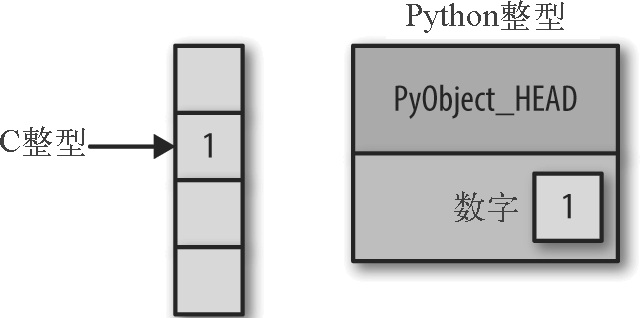

这里 `PyObject_HEAD` 是结构体中包含引用计数、类型编码和其他之前提到的内容的部分。  
两者的差异在于，`C` 语言整型本质上是对应某个内存位置的标签，里面存储的字节会编码成整型。  
而 `Python` 的整型其实是一个指针，指向包含这个 `Python` 对象所有信息的某个内存位置，其中包括可以转换成整型的字节。  
由于 `Python` 的整型结构体里面还包含了大量额外的信息，所以 `Python` 可以自由、动态地编码。但是，`Python` 类型中的这些额外信息也会成为负担，在多个对象组合的结构体中尤其明显。

## Python列表不仅仅是一个列表

动态类型的列表和固定类型的`C`（`NumPy` 式）数组间的区别如下图所示。

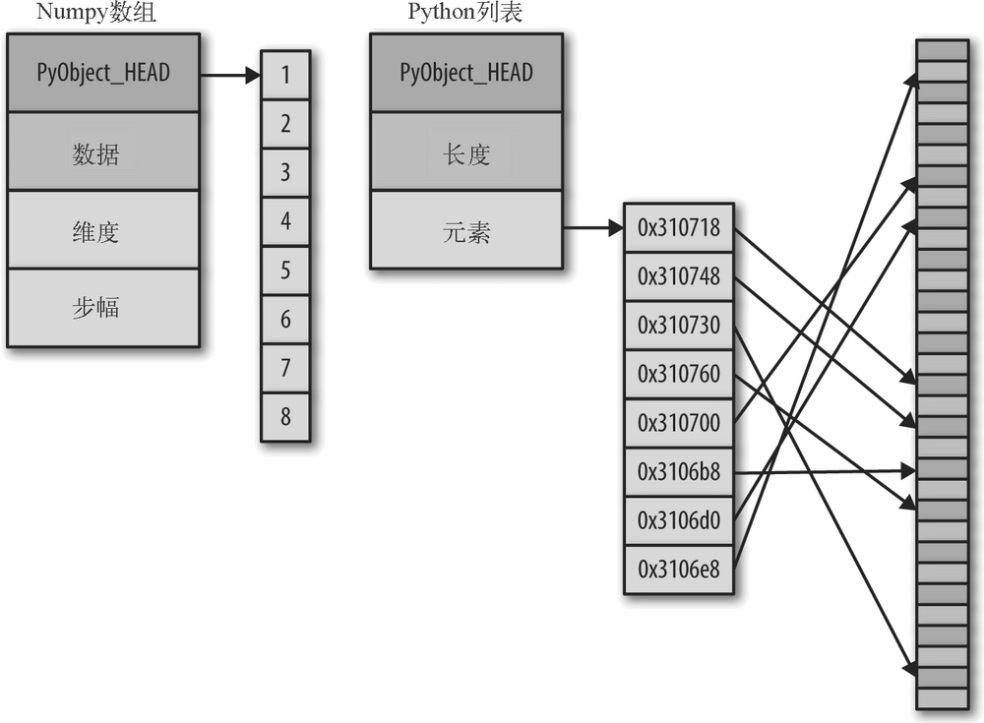

在实现层面，数组基本上包含一个指向连续数据块的指针。另一方面，`Python` 列表包含一个指向指针块的指针，这其中的每一个指针对应一个完整的 `Python` 对象（如前面看到的 `Python` 整型）。  
另外，列表的优势是灵活，因为每个列表元素是一个包含数据和类型信息的完整结构体，而且列表可以用任意类型的数据填充。  
固定类型的 `NumPy` 式数组缺乏这种灵活性，但是能更有效地存储和操作数据。

## 3. Python中的固定类型数组

`Python` 提供了几种将数据存储在有效的、固定类型的数据缓存中的选项。内置的数组（`array`）模块（在 Python 3.3 之后可用）可以用于创建统一类型的密集数组。

In [3]:
import array

L = list(range(10))
A = array.array('i', L)  # 'i' 是一个数据类型码，表示数据为整型
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

更实用的是 `NumPy` 包中的 `ndarray` 对象。`Python` 的数组对象提供了数组型数据的有效存储，而 `NumPy` 为该数据加上了高效的操作。

## 4. 从Python列表创建数组

In [4]:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

In [5]:
np.array([3.14, 4, 2, 3])  # 这里NumPy会自动将整型转为浮点型

array([3.14, 4.  , 2.  , 3.  ])

In [6]:
np.array([1, 2, 3, 4], dtype='float32')  # 明确设置数组的数据类型

array([1., 2., 3., 4.], dtype=float32)

In [7]:
np.array([range(i, i+3) for i in [2,4,6]])  # 使用嵌套列表创建一个多维数组

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

## 5. 从头创建数组

In [8]:
np.zeros(10, dtype=int)  # 创建一个长度为10， 值全部为0的整型数组

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
np.ones((3,5), dtype=float)  # 创建一个值全部为1的二维浮点型数组

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [10]:
np.full((3,5), 3.14)  # 创建一个值全部为3.14的二维数组

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [11]:
np.arange(0, 20, 2)  # 创建一个线性序列数组，与python内置的range()函数类似

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [12]:
np.linspace(0, 1, 5)  # 创建一个5个元素的数组，这5个数均匀的分配到[0， 1]

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [13]:
np.random.random((3,3))  # 创建一个3*3的，在[0, 1)上均匀分布的随机数数组

array([[0.03074424, 0.33125983, 0.93634122],
       [0.32794026, 0.1438405 , 0.34557051],
       [0.43504529, 0.6282118 , 0.52366694]])

In [14]:
np.random.normal(0, 1, (3,3))  # 创建一个3*3的，均值为0、标准差为1的正态分布的数组

array([[-1.59391155,  0.15440032, -2.07367262],
       [ 1.07269908,  1.50578571,  0.93151231],
       [ 0.72201245,  1.85159654, -0.99962206]])

In [15]:
np.random.randint(0, 10, (3,3))  # 创建一个3*3的，[0, 10)区间上的随机整数数组

array([[4, 4, 5],
       [5, 7, 7],
       [9, 5, 8]])

In [16]:
np.eye(3)  # 创建一个3*3的单位矩阵

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
np.empty(3)  # 创建一个由3个整数组成的未初始化的数组，数组的值可以是内存空间中的任意值

array([1., 1., 1.])

## 6. NumPy标准数据类型

`NumPy` 是在 `C` 语言的基础上开发的，所以 `C`、`Fortran` 和其他类似语言的用户会比较熟悉这些数据类型。  
下表列出了标准 `NumPy` 数据类型。请注意，当构建一个数组时，可以用一个字符串参数来指定数据类型：
```python
np.zeros(10, dtype='int16')
```
或者用相关的 `NumPy` 对象来指定：
```python
np.zeros(10, dtype=np.int16)
```

| 数据 | 类型描述 |
| ---- | ---- |
| bool_ | 布尔值（真、`True` 或假、`False`），用一个字节存储 |
| int_ | 默认整型（类似于 `C` 语言中的 `long`，通常情况下是 `int64` 或 `int32`） |
| intc | 同 `C` 语言的 `int` 相同（通常是 `int32` 或 `int64`） |
| intp | 用作索引的整型（和 `C` 语言的 `ssize_t` 相同，通常情况下是 `int32` 或`int64`） |
| int8 | 字节（`byte`，范围从`–128` 到 `127`） |
| int16 | 整型（范围从`–32768` 到 `32767`） |
| int32 | 整型（范围从`–2147483648` 到 `2147483647`） |
| int64 | 整型（范围从`–9223372036854775808` 到 `9223372036854775807`） |
| uint8 | 无符号整型（范围从 `0` 到 `255`） |
| uint16 | 无符号整型（范围从 `0` 到 `65535`） |
| uint32 | 无符号整型（范围从 `0` 到 `4294967295`） |
| uint64 | 无符号整型（范围从 `0` 到 `18446744073709551615`） |
| float_ | `float64` 的简化形式 |
| float16 | 半精度浮点型：符号比特位，`5` 比特位指数（exponent），10 比特位尾数（mantissa） |
| float32 | 单精度浮点型：符号比特位，`8` 比特位指数，`23` 比特位尾数 |
| float64 | 双精度浮点型：符号比特位，`11` 比特位指数，`52` 比特位尾数 |
| complex_ | `complex128` 的简化形式 |
| complex64 | 复数，由两个 `32` 位浮点数表示 |
| complex128 | 复数，由两个 `64` 位浮点数表示 |